# 1. Understand The Data

In [15]:
import pandas as pd

# read csv file using pandas
df = pd.read_csv("chiang_mai_condo_prices.csv")

In [16]:
df

,area,num_bedrooms,num_bathrooms,location,price
0,132,3,3,Nimman,458436
1,136,3,1,Nimman,299744
2,101,1,1,Hang Dong,421473
3,218,1,1,Old City,445156
4,50,3,1,Santitham,195300
...,...,...,...,...,...
196,31,4,3,Hang Dong,113863
197,283,2,3,Hang Dong,1193977
198,169,2,2,Santitham,835705
199,66,3,3,Nimman,267960


In [17]:
# print no. of rows and columns
print(df.shape)

(201, 5)


In [18]:
# print the name of column
print(df.columns)

Index(['area', 'num_bedrooms', 'num_bathrooms', 'location', 'price'], dtype='object')


In [19]:
# print the information of the dataset and check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   area           201 non-null    int64 
 1   num_bedrooms   201 non-null    int64 
 2   num_bathrooms  201 non-null    int64 
 3   location       201 non-null    object
 4   price          201 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.0+ KB


# 2. Data Splitting

In [20]:
# select the dependent and target
sel_feature = ['area', 'num_bathrooms']
X = df[sel_feature].values
y = df['price'].values

In [21]:
# import the library to split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# print the size of training and testing data
print(X_train.shape, X_test.shape)

(140, 2) (61, 2)


# 3. Use scikit-learn pipeline

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [31]:
steps = [
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('liReg', LinearRegression())
]
parameters = {"poly__degree": [2,3,4,5,7,9]}
pipeline = Pipeline(steps)

poly_grid = GridSearchCV(
    pipeline,
    parameters,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=True
)

In [32]:
poly_grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly',
                                        PolynomialFeatures(degree=5,
                                                           include_bias=False)),
                                       ('liReg', LinearRegression())]),
             param_grid={'poly__degree': [2, 3, 4, 5, 7, 9]},
             scoring='neg_mean_squared_error', verbose=True)

# 4. Check The Parameters

In [33]:
best_parameters = poly_grid.best_params_
print("Best order is : ", best_parameters)

Best order is :  {'poly__degree': 2}


# 5. Perform the predictions

In [39]:
import numpy as np

# predict the sales for testing data
ytest_pred = poly_grid.predict(X_test)

# predict the sales for training data
ytrain_pred = poly_grid.predict(X_train)

df_train_result = pd.DataFrame({'Actual': y_train, 'Predict Values': np.round(ytrain_pred)})
df_test_result = pd.DataFrame({'Actual': y_test, 'Predict Values': np.round(ytest_pred)})
df_test_result

,Actual,Predict Values
0,603500,1020082.0
1,433200,648279.0
2,234600,212345.0
3,748284,900646.0
4,915670,900646.0
...,...,...
56,867510,654854.0
57,297632,273228.0
58,732487,982652.0
59,1146724,843411.0


# 6. Visualize the result

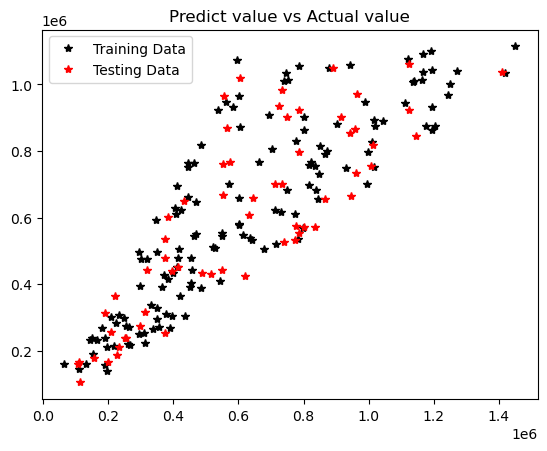

In [41]:
# import matplotlib for visualization
import matplotlib.pyplot as plt

plt.plot(y_train, ytrain_pred, 'k*')
plt.plot(y_test, ytest_pred,'r*')

plt.title("Predict value vs Actual value")
plt.legend(["Training Data", "Testing Data"])
plt.show()

# 7. Evaluate the results using metrics

In [42]:
# import the required modules
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [45]:
# evaluate on the training set
mae = mean_absolute_error(y_train, ytrain_pred)
print("Mean absolute error : ", mae)
mse = mean_squared_error(y_train, ytrain_pred)
print("Mean squared error : ", mse)
r2 = r2_score(y_train, ytrain_pred)
print("R2 score : ", r2)

Mean absolute error :  134621.63424272617
Mean squared error :  28968572166.338463
R2 score :  0.7309400944226974


In [46]:
# evaluate on the testing set
mae = mean_absolute_error(y_test, ytest_pred)
print("Mean absolute error : ", mae)
mse = mean_squared_error(y_test, ytest_pred)
print("Mean squared error : ", mse)
r2 = r2_score(y_test, ytest_pred)
print("R2 score : ", r2)

Mean absolute error :  137823.422150481
Mean squared error :  30585423552.993374
R2 score :  0.6740832928217417


In [47]:
np.mean(y_test)

606864.0163934426